<a href="https://colab.research.google.com/github/rahiakela/computer-vision-research-and-practice/blob/main/opencv-projects-and-guide/ocr-works/01_image_text_extracting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Extracting text from images with Tesseract OCR, OpenCV

**References**:

https://www.opcito.com/blogs/extracting-text-from-images-with-tesseract-ocr-opencv-and-python

https://github.com/Techyuvi/OCR

https://stackoverflow.com/questions/51696446/tesseract-installation-in-google-colaboratory

In [ ]:
%%shell

sudo apt install tesseract-ocr
pip install tesseract
pip install Pillow==9.0.0

In [2]:
import cv2
import pytesseract
import csv

from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

%matplotlib inline

In [7]:
pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')

In [ ]:
!wget https://github.com/Techyuvi/OCR/raw/master/sample_image.png

##Loading image PDF

In [4]:
# reading image using opencv
image = cv2.imread("sample_image.png")
# converting image into gray scale image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

This step is require if you have colored image because if you skip this part then tesseract won't able to detect text correctly and this will give incorrect result.

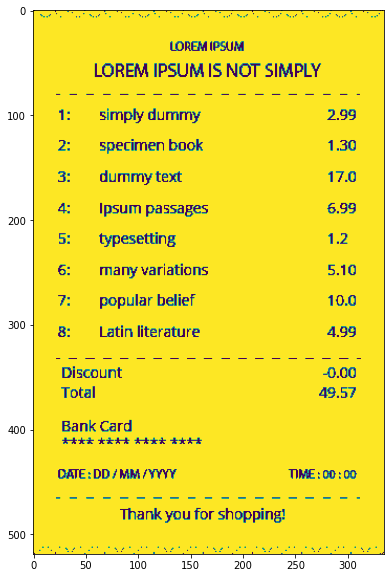

In [26]:
# converting it to binary image by Thresholding
threshold_img = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)[1]
# display image
plt.figure(figsize = (100, 10))
plt.imshow(threshold_img)

##Applying Tesseract

In [8]:
# configuring parameters for tesseract

# 3-By Default, based on what is currently available
# 6-Assume a single uniform block of text
custom_config = r"--oem 3 --psm 6"  

# now feeding image to tesseract
details = pytesseract.image_to_data(threshold_img, output_type=pytesseract.Output.DICT, config=custom_config, lang="eng")

In [10]:
print(details.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


##Drawing the bounding box

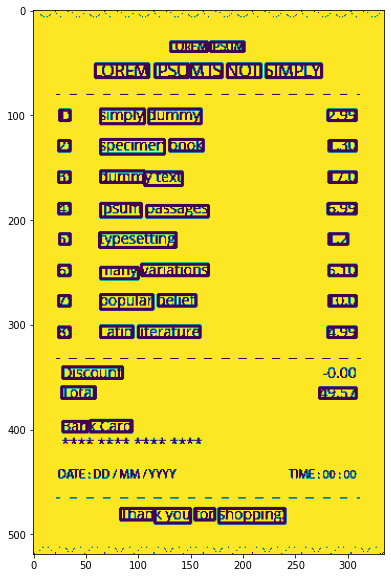

In [27]:
total_boxes = len(details["text"])

for seq_num in range(total_boxes):
  # if confidence score is greater than 30
  if int(details["conf"][seq_num]) > 30:
    (x, y, w, h) = (details["left"][seq_num], details["top"][seq_num], details["width"][seq_num], details["height"][seq_num])
    threshold_img = cv2.rectangle(threshold_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.figure(figsize = (100, 10))
plt.imshow(threshold_img)

##Extract text from image

In [14]:
parse_text = []
word_list = []
last_word = ""

for word in details["text"]:
  if word != "":
    word_list.append(word)
    last_word = word
  if (last_word != "" and word == "") or (word == details["text"][-1]):
    parse_text.append(word_list)
    word_list = []

In [15]:
# convert the result text into a file
with open("result_text.txt", "w", newline="") as f:
  csv.writer(f, delimiter=" ").writerows(parse_text)

In [18]:
# read file line by line
with open("result_text.txt", "r") as f:
  i = 1
  for line in f:
    print(f"{str(i)} - {line}")
    i = i + 1

1 - LOREM IPSUM

2 - LOREM IPSUM IS NOT SIMPLY

3 - 

4 - 1: simply dummy 299

5 - 2: specimen book 1.30

6 - 3: dummy text 170

7 - 4: Ipsum passages 6.99

8 - 5: typesetting 1.2

9 - 6 many variations 5.10

10 - 7: popular belief 10.0

11 - & Latin literature 439

12 - Discount 0.00

13 - Total 49.57

14 - Bank Card

15 - 

16 - OATE:DD/MM VTE TIME: 00:00

17 - 

18 - Thank you for shopping!

